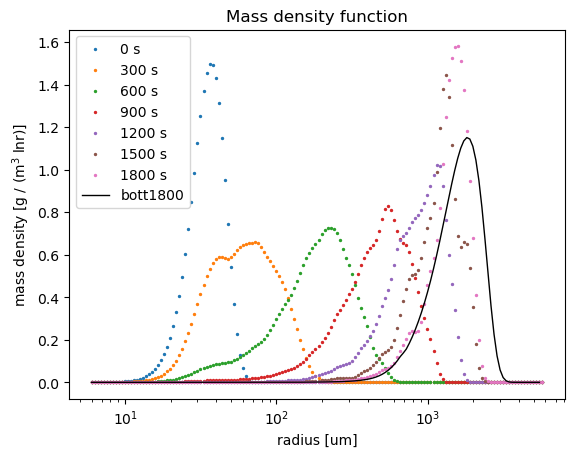

In [1]:
import numpy as np
from matplotlib import pyplot
import netCDF4
bott1800 = np.array([1.38199e-05, 1.57908e-05, 1.79305e-05, 2.02468e-05, 2.27597e-05, 2.55066e-05, 2.85295e-05, 3.18587e-05, 3.55041e-05, 3.94589e-05, 4.3714e-05, 4.82583e-05, 5.3107e-05, 5.82765e-05, 6.37843e-05, 6.96515e-05, 7.59039e-05, 8.25861e-05, 8.97817e-05, 9.7613e-05, 0.000106259, 0.000115913, 0.000126733, 0.000138828, 0.000152281, 0.000167097, 0.000183154, 0.000200313, 0.000218507, 0.000237468, 0.000256677, 0.000274845, 0.000290957, 0.000304515, 0.000314301, 0.000317331, 0.000311517, 0.000297198, 0.000275879, 0.000250005, 0.000222306, 0.000201047, 0.000190701, 0.000181325, 0.000172454, 0.000164238, 0.000159034, 0.000156689, 0.000155278, 0.000154838, 0.000154788, 0.000155249, 0.000156931, 0.000160285, 0.000166335, 0.00017442, 0.000184645, 0.00019718, 0.000211995, 0.000229172, 0.000248871, 0.000272454, 0.000300346, 0.000331661, 0.000366821, 0.000406322, 0.000450999, 0.00050156, 0.000558714, 0.00062337, 0.000696966, 0.00078046, 0.0008754, 0.000983683, 0.00110756, 0.00124968, 0.00141387, 0.00160394, 0.00182415, 0.00208052, 0.00238027, 0.00273237, 0.00314791, 0.00364083, 0.00422857, 0.00493568, 0.00578798, 0.00682106, 0.00808022, 0.00962269, 0.0115211, 0.0138674, 0.0167778, 0.0203984, 0.0249108, 0.030539, 0.0375565, 0.0461041, 0.0563682, 0.0687794, 0.0835501, 0.100858, 0.12079, 0.137515, 0.156138, 0.183594, 0.214335, 0.248523, 0.286324, 0.327896, 0.373386, 0.422884, 0.476408, 0.533889, 0.595081, 0.659549, 0.726619, 0.795314, 0.864311, 0.931858, 0.995727, 1.05315, 1.10078, 1.13471, 1.15053, 1.14362, 1.10956, 1.04496, 0.948523, 0.822462, 0.673665, 0.514086, 0.359412, 0.225616, 0.124174, 0.058276, 0.0225813, 0.00696037, 0.00163505, 0.000278816, 3.26663e-05, 2.53925e-06, 1.27047e-07, 3.82823e-09, 6.48661e-11, 5.83051e-13, 2.62537e-15, 5.62474e-18, 0])

fp="./cmake-build-release/data.nc"
nc = netCDF4.Dataset(fp)
mass_density=nc["mass density"][:]
bins = 6.*pow(10, -6 + np.arange(150)/50.)
legend=[]
for i in np.arange(0,len(mass_density),300):
    pyplot.scatter(bins*1e6,mass_density[i,:], s=2)
    legend.append(str(i)+" s")
pyplot.plot(bins[:-1]*1e6, bott1800, color='black', linewidth=1)
legend.append('bott1800')
pyplot.ylabel('mass density [g / (m$^3$ lnr)]')
pyplot.xlabel('radius [um]')
pyplot.xscale('log')
pyplot.legend(legend)
pyplot.title('Mass density function')
pyplot.show()

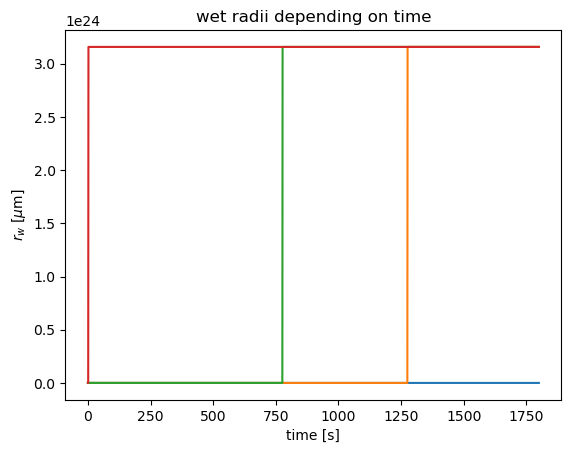

In [2]:
rw=np.sqrt(np.asarray(nc['wet radius squared'][:]))
for drop_id in np.arange(0,rw.shape[1],30000):
        pyplot.plot(rw[:,drop_id]*1e6)
pyplot.ylabel('$r_w$ [$\mu$m]')
pyplot.xlabel('time [s]')
pyplot.title('wet radii depending on time')
pyplot.show()

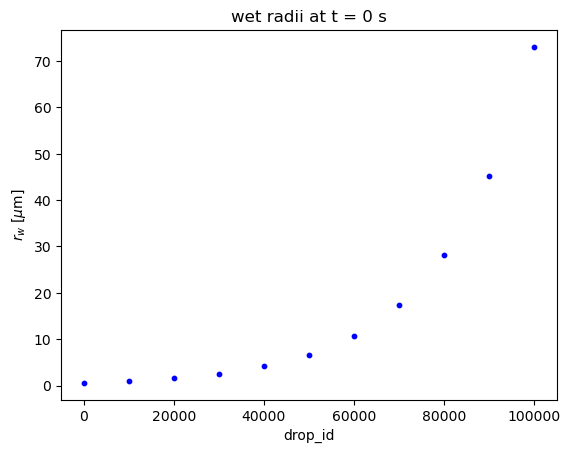

In [3]:
for drop_id in np.arange(0,rw.shape[1],10000):
    pyplot.scatter(drop_id,rw[0,drop_id]*1e6,color='b',s=10)
pyplot.ylabel('$r_w$ [$\mu$m]')
pyplot.xlabel('drop_id')
pyplot.title("wet radii at t = 0 s")
pyplot.show()

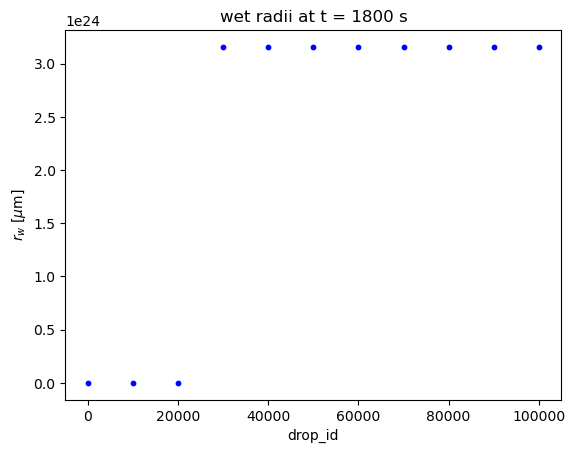

In [4]:
for drop_id in np.arange(0,rw.shape[1],10000):
    pyplot.scatter(drop_id,rw[-1,drop_id]*1e6,color='b',s=10)
pyplot.ylabel('$r_w$ [$\mu$m]')
pyplot.xlabel('drop_id')
pyplot.title("wet radii at t = 1800 s")
pyplot.show()

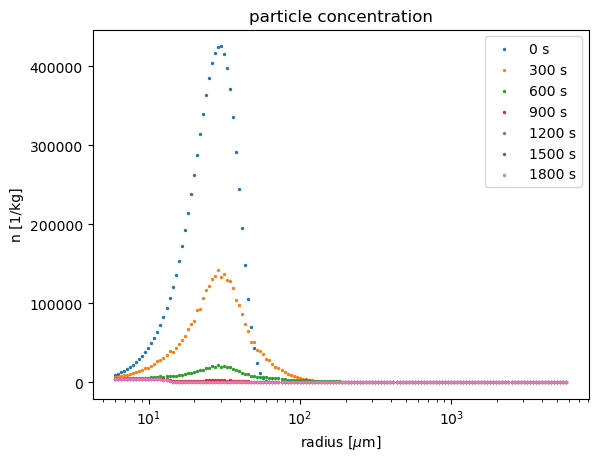

In [5]:
import numpy.ma as ma
mom0=ma.getdata(nc["moment 0"][:])
legend=[]
for i in np.arange(0,mom0.shape[0],300):
    pyplot.scatter(bins*1e6,mom0[i,:],s=2)
    legend.append(str(i)+" s")
pyplot.ylabel('n [1/kg]')
pyplot.xlabel('radius [$\mu$m]')
pyplot.xscale('log')
pyplot.legend(legend)
pyplot.title('particle concentration')
pyplot.show()
